In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import biaxial_relax
import pickle

NODE MAE, RG MAE, NODE MRE, RG MRE
0.021167538827617294 0.021437214216781398 0.011937980068696494 0.01193830384509618
0.018718776934356147 0.021295272457163884 0.006770571557674803 0.008304015033429337
0.016086391996917422 0.03608373960985179 0.005083233522450451 0.009137130295488693


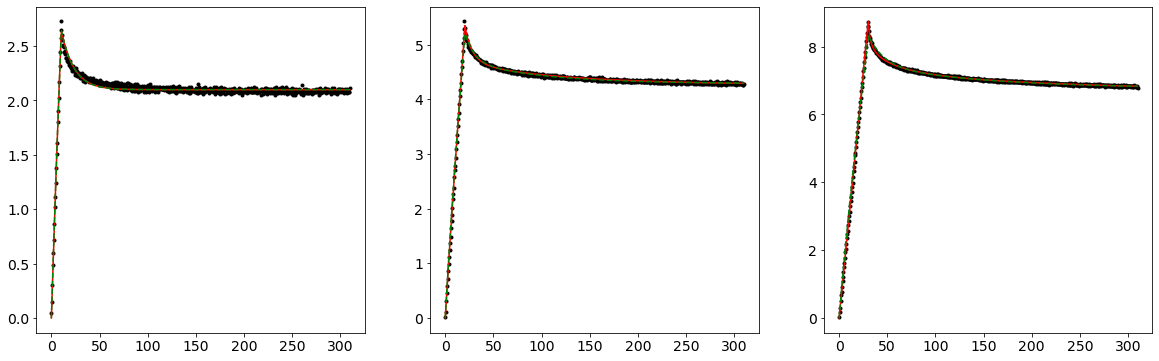

In [2]:
# Bloodclots
fig, ax = plt.subplots(1,3, figsize=(20,6))

with open('training_data/manu_bloodclots_short.npy','rb') as f:
    time, lmb_x, lmb_y, sgm_x, sgm_y = pickle.load(f)
t = time[0]

print('NODE MAE, RG MAE, NODE MRE, RG MRE')
for i, case in enumerate(['TVV', 'VTV', 'VVT']):
    with open('saved/bc_'+case+'_params_retrained.npy', 'rb') as f:
        params = pickle.load(f)
    with open('saved/bc_'+case+'_Phi_norm_w.npy', 'rb') as f:
        Phi_norm = pickle.load(f)
    with open('saved/bc_'+case+'_gov_params.npy', 'rb') as f:
        gov_params = pickle.load(f)
    norm = (None, None, Phi_norm)

    sig_NN, lm1_NN, lm2_NN, lm3_NN, lm1e_NN, lm2e_NN, lm3e_NN  = biaxial_relax(params, norm, True, t, lmb_x[i],lmb_y[i], dt0=0.5)
    sig_RG, lm1_NN, lm2_NN, lm3_NN, lm1e_NN, lm2e_NN, lm3e_NN  = biaxial_relax(gov_params, norm, False, t, lmb_x[i],lmb_y[i], dt0=0.5)
    mae_nn = np.mean(np.abs( sgm_x[i] - sig_NN[:,0,0]))
    mre_nn = np.mean(np.abs((sgm_x[i] - sig_NN[:,0,0])/sgm_x[i]))
    mae_rg = np.mean(np.abs( sgm_x[i] - sig_RG[:,0,0]))
    mre_rg = np.mean(np.abs((sgm_x[i] - sig_RG[:,0,0])/sgm_x[i]))
    print(mae_nn, mae_rg, mre_nn, mre_rg)
    ax[i].plot(t, sgm_x[i], 'k.')
    ax[i].plot(t, sig_NN[:,0,0], 'r-')
    ax[i].plot(t, sig_RG[:,0,0], 'g--')

In [9]:
# Brain
for case in ['BG', 'CC', 'CR', 'CO']:
    df = pd.read_csv('tikz_data/fig_brain/fig_brain_' + case + '.csv', sep = ' ')
    mae_nn = np.mean(np.abs(df.y_gt - df.y_nn))
    mre_nn = np.mean(np.abs((df.y_gt - df.y_nn)/df.y_gt))

    mae_rg = np.mean(np.abs(df.y_gt - df.y_rg))
    mre_rg = np.mean(np.abs((df.y_gt - df.y_rg)/df.y_gt))
    print(mae_nn, mae_rg, mre_nn, mre_rg)


0.011974227249321819 0.016096313588382993 0.04246152484988605 0.05586754571964483
0.01929616594629058 0.024759455879258048 0.09019133681651349 0.11473031027285874
0.02203498385991485 0.02965484836019632 0.053739198390944924 0.07213157365139145
0.02740171786077812 0.04788599494828391 0.047329632068679205 0.08177795722892447


In [2]:
# Rubber
df = pd.read_csv('tikz_data/fig_rubber/fig_rubber_a.csv', sep = ' ')
df = df[1:]
mae_nn = np.mean(np.abs(df.y_gt - df.y_nn))
mre_nn = np.mean(np.abs((df.y_gt - df.y_nn)/df.y_gt))

mae_rg = np.mean(np.abs(df.y_gt - df.y_rg))
mre_rg = np.mean(np.abs((df.y_gt - df.y_rg)/df.y_gt))
print(mae_nn, mae_rg, mre_nn, mre_rg)

0.014094197953249156 0.07075917687505594 0.021782097067404825 0.08052080726304162


In [4]:
import matplotlib.pyplot as plt

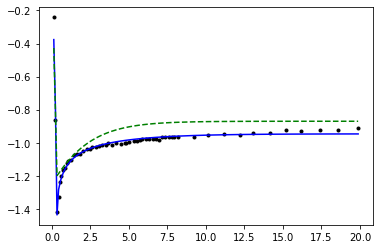

In [6]:
plt.plot(df.x, df.y_gt, 'k.')
plt.plot(df.x, df.y_nn, 'b-')
plt.plot(df.x, df.y_rg, 'g--')

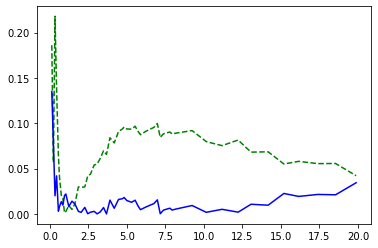

In [7]:
plt.plot(df.x, np.abs(df.y_gt-df.y_rg), 'g--')
plt.plot(df.x, np.abs(df.y_gt-df.y_nn), 'b-')